In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/parit/Downloads/train.csv")

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    12980 non-null  object 
 1   season      12980 non-null  int64  
 2   holiday     12980 non-null  int64  
 3   workingday  12980 non-null  int64  
 4   weather     12980 non-null  int64  
 5   temp        12980 non-null  float64
 6   atemp       12980 non-null  float64
 7   humidity    12980 non-null  float64
 8   windspeed   12980 non-null  float64
 9   casual      12980 non-null  int64  
 10  registered  12980 non-null  int64  
 11  count       12980 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


In [5]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [6]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## EDA

<Axes: xlabel='season', ylabel='count'>

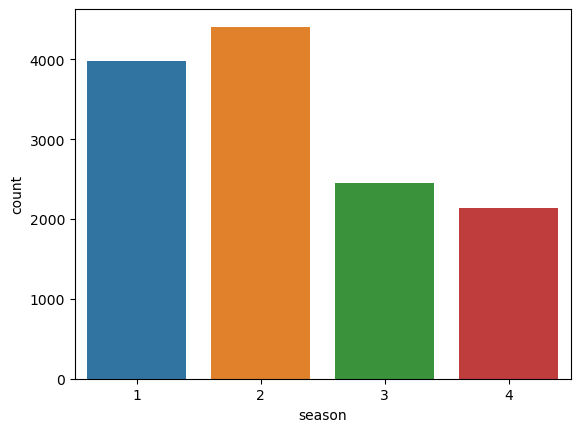

In [7]:
sns.countplot(x=data.season,data=data)

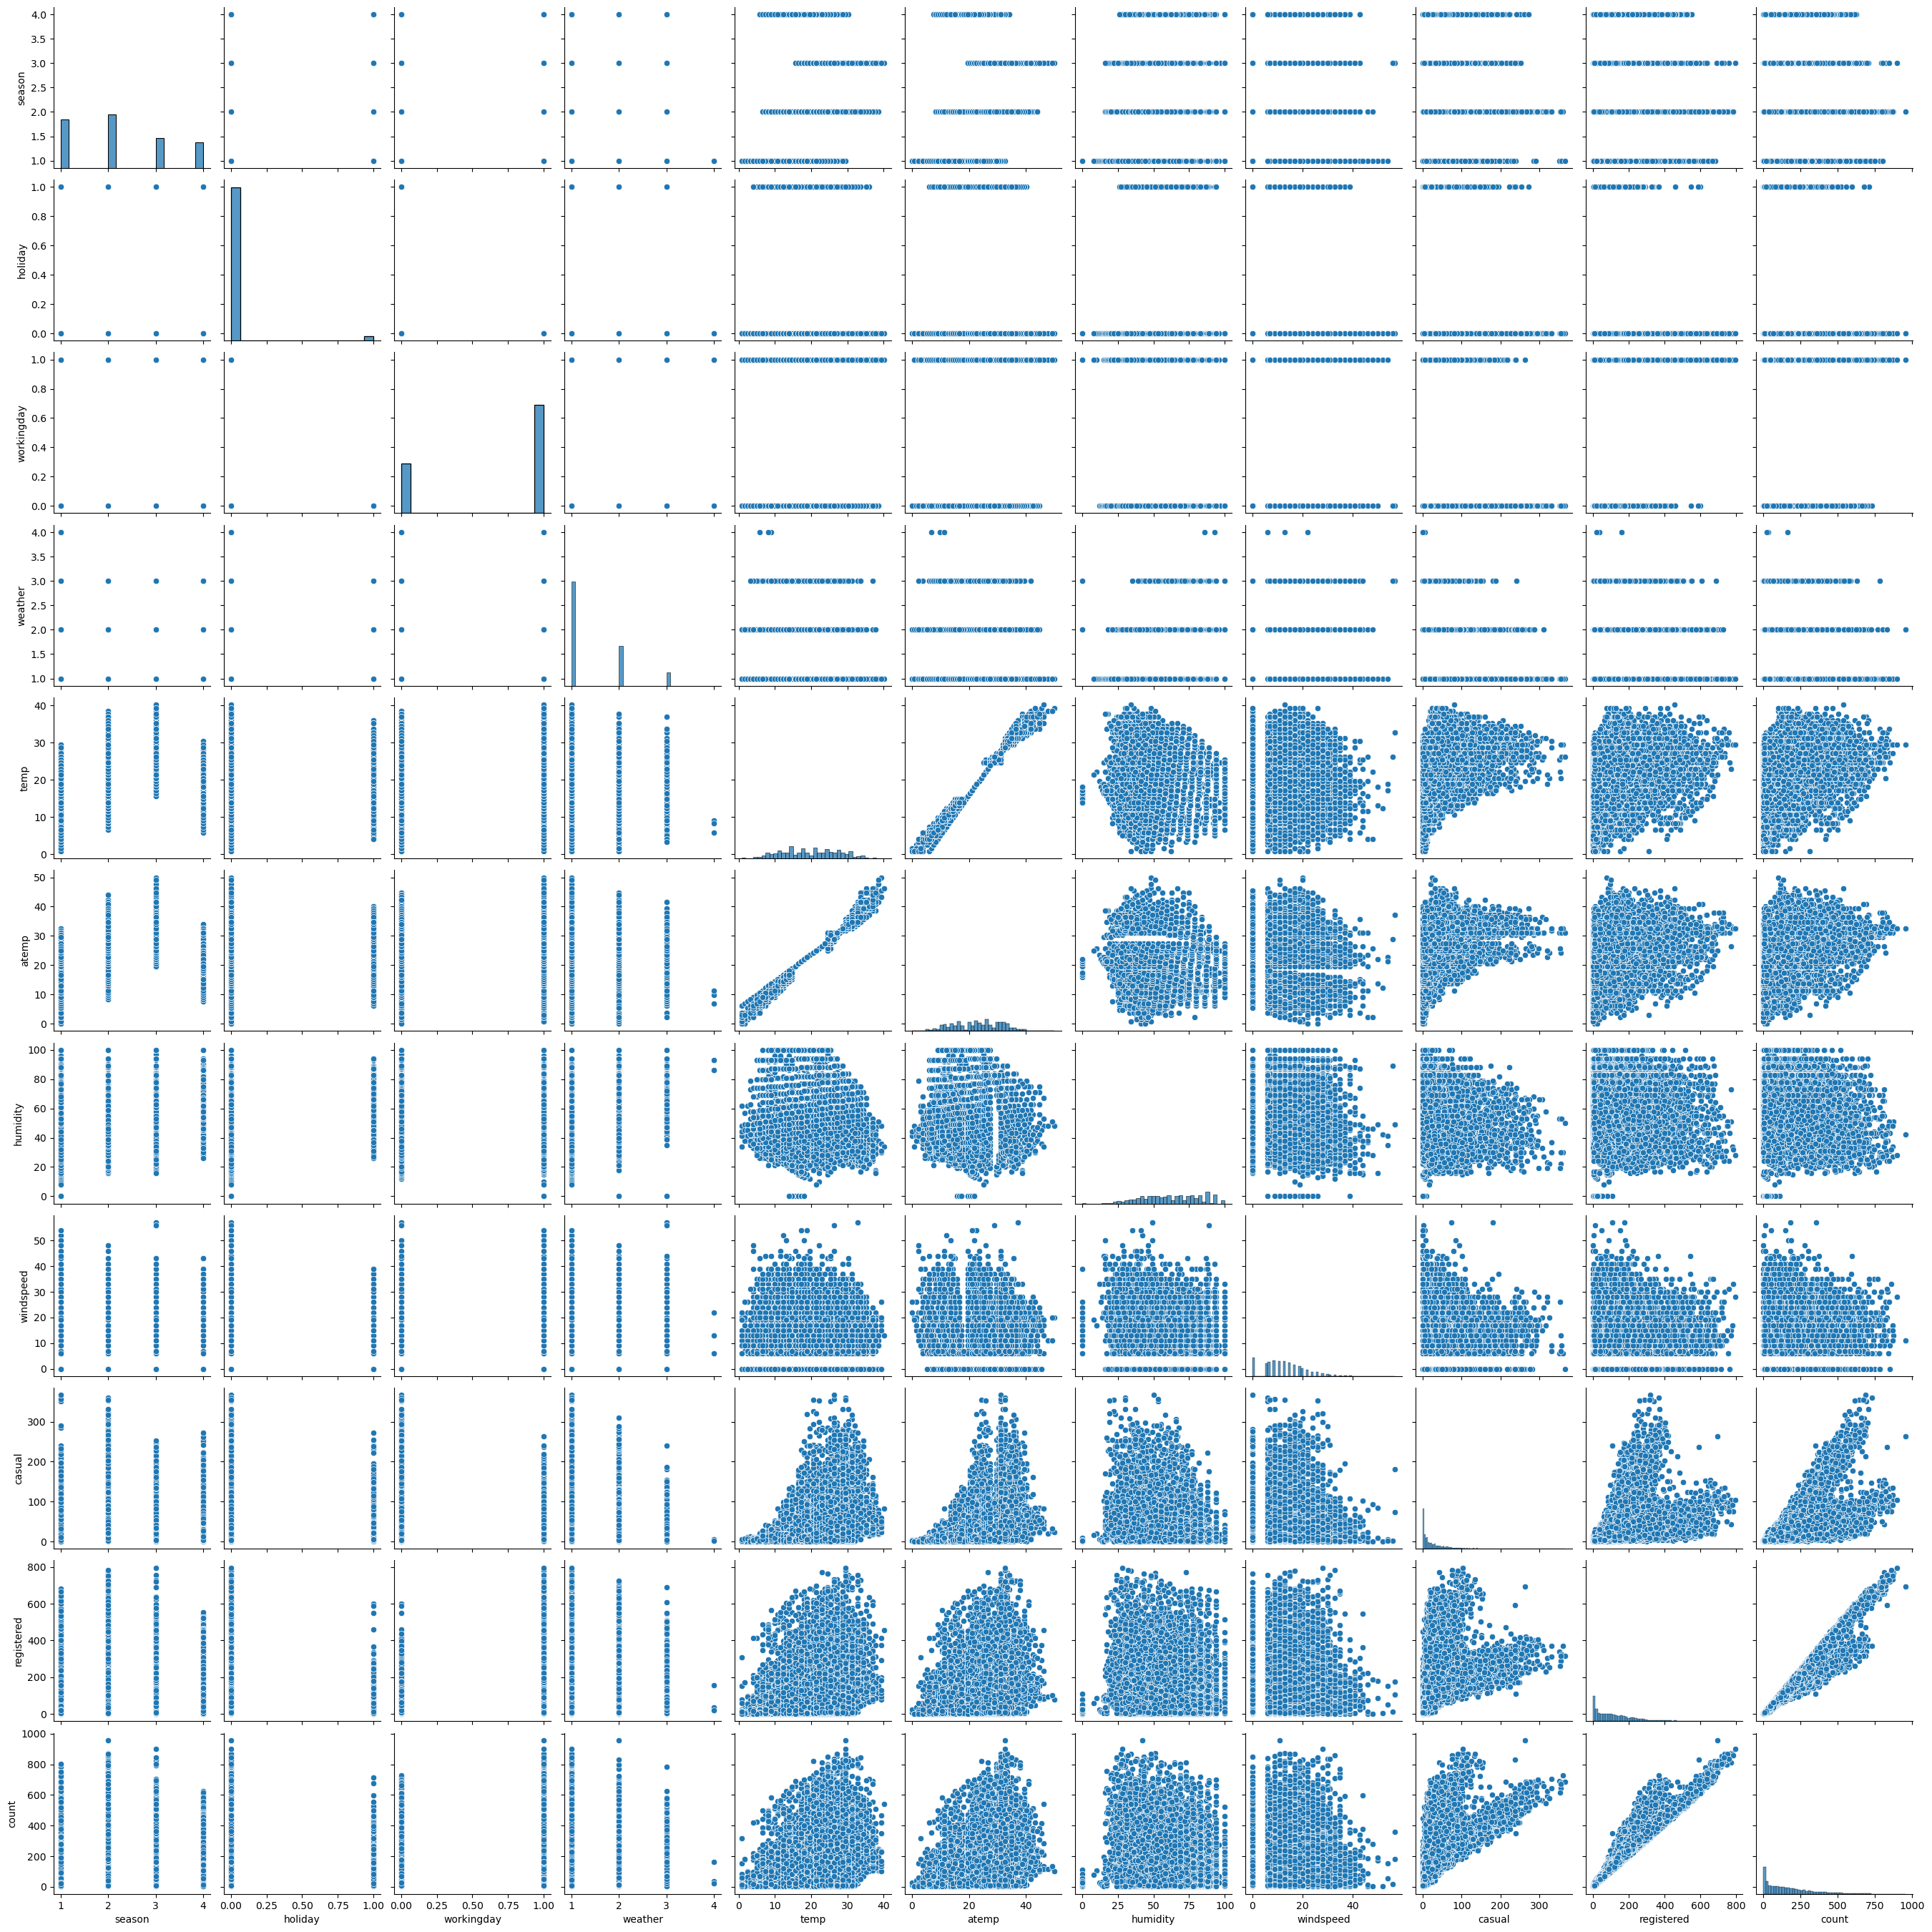

In [8]:
sns.pairplot(data)

<Axes: xlabel='holiday', ylabel='count'>

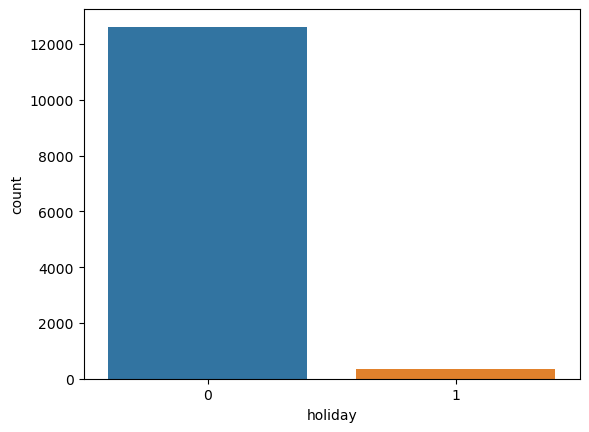

In [9]:
sns.countplot(x=data.holiday,data=data)

<Axes: xlabel='workingday', ylabel='count'>

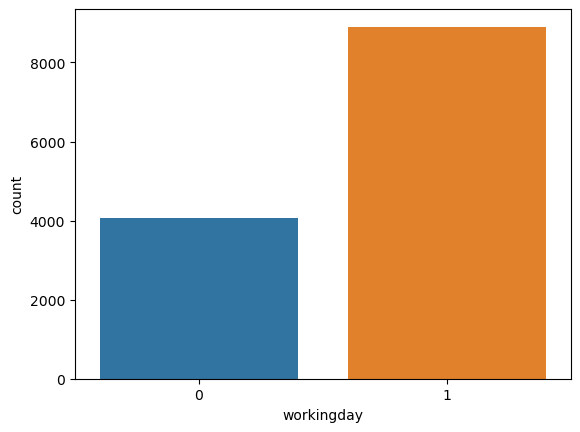

In [14]:
sns.countplot(x=data.workingday,data=data)

<Axes: xlabel='weather', ylabel='count'>

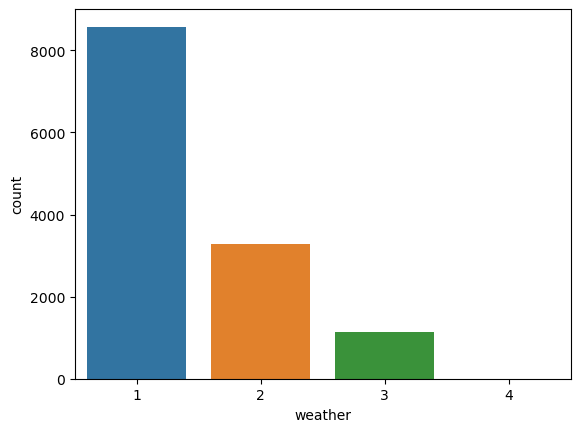

In [15]:
sns.countplot(x=data.weather,data=data)

In [16]:
data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40


In [17]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [18]:
x=data[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered']]
y=data["count"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

## Multiple linear regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lin=LinearRegression()

In [23]:
model=lin.fit(x_train,y_train)

In [24]:
pred=model.predict(x_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
print("accuracy score for training data =",model.score(x_train,y_train))
print("accuracy score for testing data =",r2_score(y_test,pred))

accuracy score for training data = 1.0
accuracy score for testing data = 1.0


### 100% accurate model

In [27]:
x_test.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
10757,2,0,1,1,18.86,22.725,47.0,27.9993,26,628
3292,2,0,0,1,21.32,25.000,94.0,7.0015,18,50


In [28]:
x_test["Actual_count"]=y_test
x_test["predicted_count"]=pred
x_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Actual_count,predicted_count
10757,2,0,1,1,18.86,22.725,47.0,27.9993,26,628,654,654.0
3292,2,0,0,1,21.32,25.000,94.0,7.0015,18,50,68,68.0
1504,1,0,1,1,9.84,12.120,52.0,8.9981,0,4,4,4.0
630,1,0,0,2,9.02,11.365,55.0,11.0014,9,56,65,65.0
6588,4,0,1,1,17.22,21.210,88.0,0.0000,0,5,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6050,3,0,1,1,31.16,34.850,52.0,19.0012,36,241,277,277.0
3529,2,0,1,1,29.52,34.850,79.0,6.0032,15,46,61,61.0
2722,2,0,1,2,27.06,30.305,78.0,30.0026,31,367,398,398.0
8573,1,0,1,2,9.02,11.365,47.0,12.9980,4,24,28,28.0


### predict target variable count from test csv

In [29]:
test_data=pd.read_csv("C:/Users/parit/Downloads/test.csv")

In [30]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [31]:
test_data.drop(columns="datetime",inplace=True)

In [32]:
test_data.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,3,0,0,3,26.24,28.79,89.0,15.0013,3,55
1,3,0,0,2,26.24,28.79,89.0,0.0000,7,54


In [33]:
pred2=model.predict(test_data)

In [34]:
test_data["predicted_count"]=pred2
test_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,predicted_count
0,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,58.0
1,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,61.0
2,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,23.0
3,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,18.0
4,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,10.0
...,...,...,...,...,...,...,...,...,...,...,...
4394,1,0,1,2,10.66,12.880,60.0,11.0014,11,108,119.0
4395,1,0,1,2,10.66,12.880,60.0,11.0014,8,81,89.0
4396,1,0,1,1,10.66,12.880,60.0,11.0014,7,83,90.0
4397,1,0,1,1,10.66,13.635,56.0,8.9981,13,48,61.0


In [35]:
final_data=pd.read_csv("C:/Users/parit/Downloads/test.csv")

In [36]:
final_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [37]:
final_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [38]:
final_data.drop(columns=['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],inplace=True)

In [39]:
final_data["predicted_count"]=pred2

In [40]:
final_data

,datetime,predicted_count
0,2012-06-30 1:00:00,58.0
1,2012-06-30 2:00:00,61.0
2,2012-06-30 3:00:00,23.0
3,2012-06-30 4:00:00,18.0
4,2012-06-30 5:00:00,10.0
...,...,...
4394,2012-12-31 19:00:00,119.0
4395,2012-12-31 20:00:00,89.0
4396,2012-12-31 21:00:00,90.0
4397,2012-12-31 22:00:00,61.0
